# Importing

## Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
import time
import random
import math

## Importing own 

In [2]:
from generateSpace import *
from plotLattice import *
from getTriangleLengths import *
from potentialEnergyPerTrio import *
from potentialEnergy import *
from potentialEnergyPerParticle import *
from numberOfCalculations import *
from makeRandomDatabase import *

# Generating data

## Generating data

In [3]:
numberOfDatapoints = 1000
numberOfSurroundingCells = 4
numberOfParticlesPerCell = 4
potentialEnergyFunction = potentialEnergyPerTrio# Set the potential energy function of the data base as a function
widthOfCell = [1.0, 1.0]# The width of a singe cell.
filename = 'UnAdjustedWidth1'# Name of the file in which the data will be stored, set to a boolean if you don't want to store the data.

data = makeRandomDatabase(numberOfDatapoints, numberOfSurroundingCells, numberOfParticlesPerCell, potentialEnergyFunction, widthOfCell, filename)

Predicted amount of calculations: 206084000
Assuming 15 us per calculation, estimated time needed: 3092 seconds
  1 % done, time left 3089 seconds.
  1 % done, time left 3086 seconds.
  1 % done, time left 3082 seconds.
  1 % done, time left 3079 seconds.
  1 % done, time left 3076 seconds.
  1 % done, time left 3073 seconds.
  1 % done, time left 3070 seconds.
  1 % done, time left 3067 seconds.
  1 % done, time left 3064 seconds.
  1 % done, time left 3061 seconds.
  2 % done, time left 3058 seconds.
  2 % done, time left 3055 seconds.
  2 % done, time left 3052 seconds.
  2 % done, time left 3048 seconds.
  2 % done, time left 3045 seconds.
  2 % done, time left 3042 seconds.
  2 % done, time left 3039 seconds.
  2 % done, time left 3036 seconds.
  2 % done, time left 3033 seconds.
  2 % done, time left 3030 seconds.
  3 % done, time left 3027 seconds.
  3 % done, time left 3024 seconds.
  3 % done, time left 3021 seconds.
  3 % done, time left 3018 seconds.
  3 % done, time left 30

 23 % done, time left 2393 seconds.
 23 % done, time left 2390 seconds.
 23 % done, time left 2387 seconds.
 23 % done, time left 2384 seconds.
 23 % done, time left 2381 seconds.
 24 % done, time left 2378 seconds.
 24 % done, time left 2375 seconds.
 24 % done, time left 2371 seconds.
 24 % done, time left 2368 seconds.
 24 % done, time left 2365 seconds.
 24 % done, time left 2362 seconds.
 24 % done, time left 2359 seconds.
 24 % done, time left 2356 seconds.
 24 % done, time left 2353 seconds.
 24 % done, time left 2350 seconds.
 25 % done, time left 2347 seconds.
 25 % done, time left 2344 seconds.
 25 % done, time left 2341 seconds.
 25 % done, time left 2337 seconds.
 25 % done, time left 2334 seconds.
 25 % done, time left 2331 seconds.
 25 % done, time left 2328 seconds.
 25 % done, time left 2325 seconds.
 25 % done, time left 2322 seconds.
 25 % done, time left 2319 seconds.
 26 % done, time left 2316 seconds.
 26 % done, time left 2313 seconds.
 26 % done, time left 2310 s

 46 % done, time left 1688 seconds.
 46 % done, time left 1685 seconds.
 46 % done, time left 1682 seconds.
 46 % done, time left 1679 seconds.
 46 % done, time left 1676 seconds.
 46 % done, time left 1673 seconds.
 46 % done, time left 1670 seconds.
 47 % done, time left 1667 seconds.
 47 % done, time left 1664 seconds.
 47 % done, time left 1661 seconds.
 47 % done, time left 1657 seconds.
 47 % done, time left 1654 seconds.
 47 % done, time left 1651 seconds.
 47 % done, time left 1648 seconds.
 47 % done, time left 1645 seconds.
 47 % done, time left 1642 seconds.
 47 % done, time left 1639 seconds.
 48 % done, time left 1636 seconds.
 48 % done, time left 1633 seconds.
 48 % done, time left 1630 seconds.
 48 % done, time left 1627 seconds.
 48 % done, time left 1623 seconds.
 48 % done, time left 1620 seconds.
 48 % done, time left 1617 seconds.
 48 % done, time left 1614 seconds.
 48 % done, time left 1611 seconds.
 48 % done, time left 1608 seconds.
 49 % done, time left 1605 s

 69 % done, time left 984 seconds.
 69 % done, time left 980 seconds.
 69 % done, time left 977 seconds.
 69 % done, time left 974 seconds.
 69 % done, time left 971 seconds.
 69 % done, time left 968 seconds.
 69 % done, time left 965 seconds.
 69 % done, time left 962 seconds.
 69 % done, time left 959 seconds.
 70 % done, time left 956 seconds.
 70 % done, time left 953 seconds.
 70 % done, time left 950 seconds.
 70 % done, time left 946 seconds.
 70 % done, time left 943 seconds.
 70 % done, time left 940 seconds.
 70 % done, time left 937 seconds.
 70 % done, time left 934 seconds.
 70 % done, time left 931 seconds.
 70 % done, time left 928 seconds.
 71 % done, time left 925 seconds.
 71 % done, time left 922 seconds.
 71 % done, time left 919 seconds.
 71 % done, time left 916 seconds.
 71 % done, time left 912 seconds.
 71 % done, time left 909 seconds.
 71 % done, time left 906 seconds.
 71 % done, time left 903 seconds.
 71 % done, time left 900 seconds.
 71 % done, time lef

 92 % done, time left 257 seconds.
 92 % done, time left 254 seconds.
 92 % done, time left 251 seconds.
 92 % done, time left 248 seconds.
 93 % done, time left 245 seconds.
 93 % done, time left 242 seconds.
 93 % done, time left 239 seconds.
 93 % done, time left 235 seconds.
 93 % done, time left 232 seconds.
 93 % done, time left 229 seconds.
 93 % done, time left 226 seconds.
 93 % done, time left 223 seconds.
 93 % done, time left 220 seconds.
 93 % done, time left 217 seconds.
 94 % done, time left 214 seconds.
 94 % done, time left 211 seconds.
 94 % done, time left 208 seconds.
 94 % done, time left 205 seconds.
 94 % done, time left 201 seconds.
 94 % done, time left 198 seconds.
 94 % done, time left 195 seconds.
 94 % done, time left 192 seconds.
 94 % done, time left 189 seconds.
 94 % done, time left 186 seconds.
 95 % done, time left 183 seconds.
 95 % done, time left 180 seconds.
 95 % done, time left 177 seconds.
 95 % done, time left 174 seconds.
 95 % done, time lef

## Inspecting data

In [4]:
data.head()

,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy
0,"[[0.7946797694202125, 0.42600188411572626], [0...",1.0,4,9.428283e+09
1,"[[0.7315098840750606, 0.14946779587468206], [0...",1.0,4,1.913576e+08
2,"[[0.5076718839448501, 0.9567283410310528], [0....",1.0,4,8.176308e+07
3,"[[0.46640472284258094, 0.004191371360701246], ...",1.0,4,2.812697e+06
4,"[[0.765610604496229, 0.6291609204906523], [0.8...",1.0,4,1.158114e+08


Plotting datapoint  0  with energy  9428283111.88366


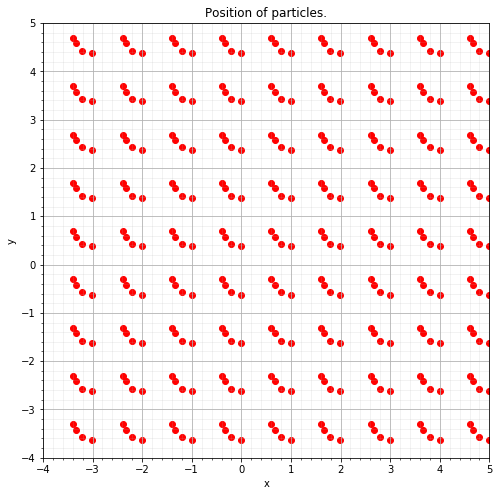

Plotting datapoint  1  with energy  191357600.1379183


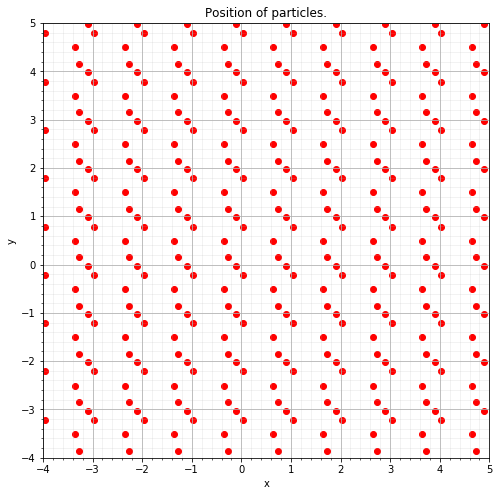

Plotting datapoint  2  with energy  81763078.80261075


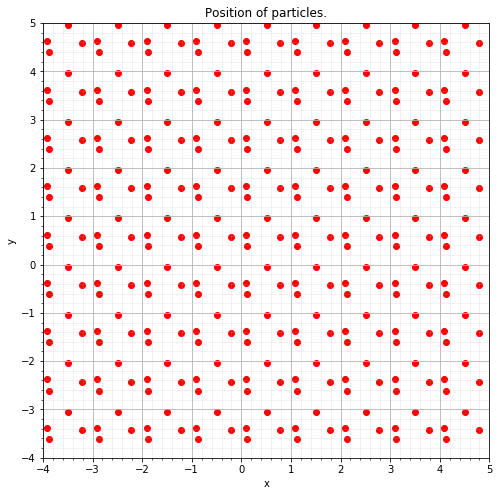

Plotting datapoint  3  with energy  2812697.140460846


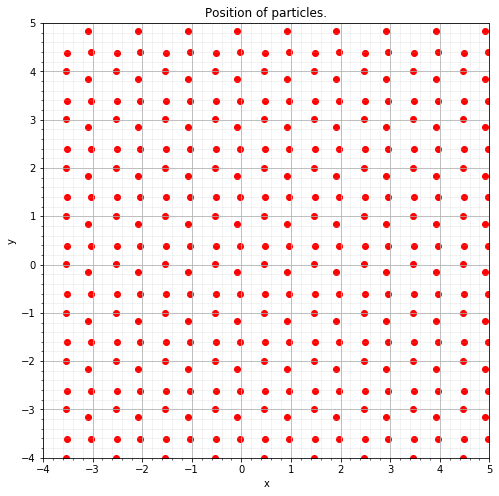

Plotting datapoint  4  with energy  115811443.06983973


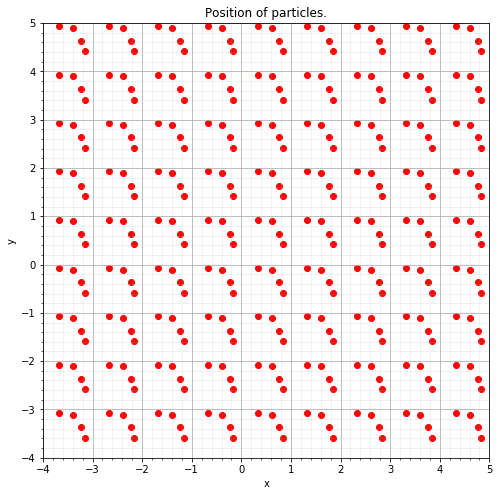

Plotting datapoint  5  with energy  13082624359.531029


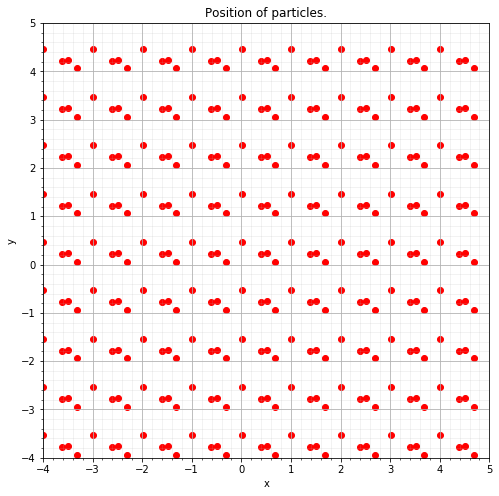

Plotting datapoint  6  with energy  142227718.1582586


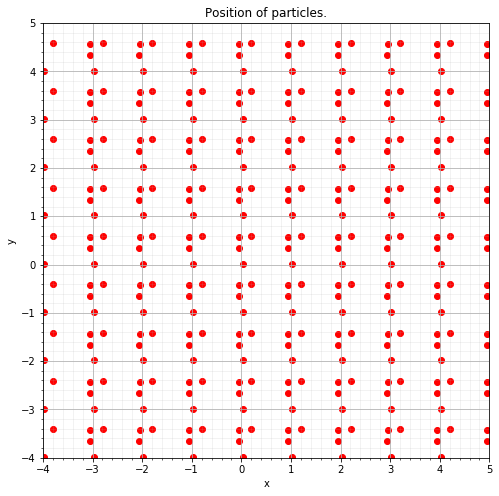

Plotting datapoint  7  with energy  735223993830.1467


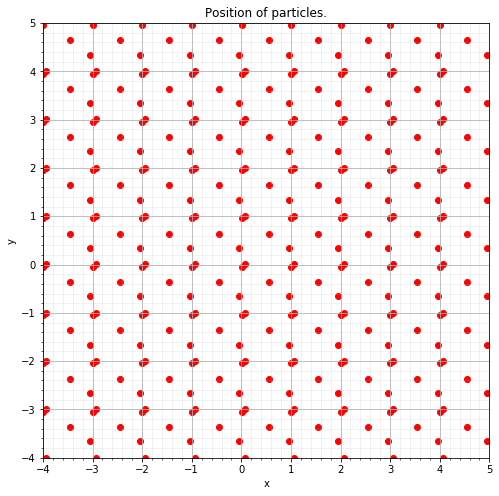

Plotting datapoint  8  with energy  3073487567.4576135


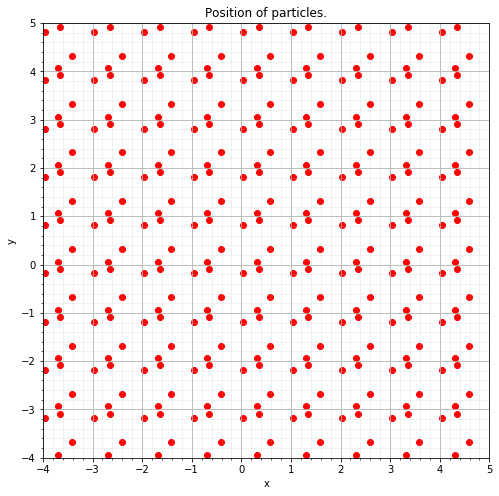

Plotting datapoint  9  with energy  32046305.998793878


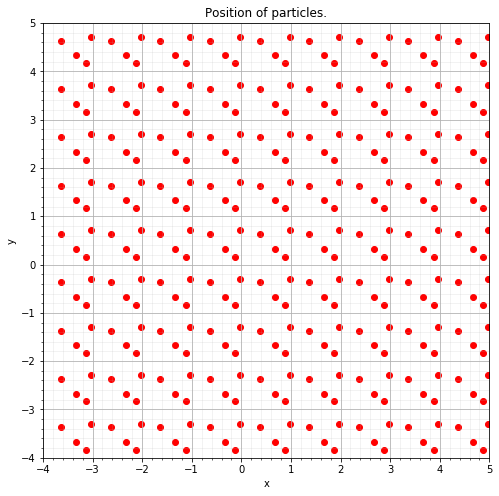

In [5]:
amountToPlot = min([10, numberOfDatapoints])

for i in range(0, amountToPlot):
    print('Plotting datapoint ', i, ' with energy ', data['potentialEnergy'][i])
    plotLatticeFromDataFrame(data, i)

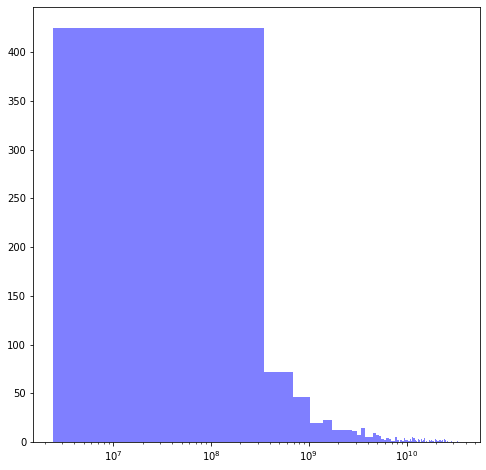

In [40]:
qLow = data['potentialEnergy'].quantile(0)
qHi  = data['potentialEnergy'].quantile(0.80)

dataFiltered = data[(data['potentialEnergy'] < qHi) & (data['potentialEnergy'] > qLow)]

x = dataFiltered['potentialEnergy']
num_bins = 100

fig, ax = plt.subplots(figsize=(8, 8))
#ax.set_xlim([0, 10**19])
ax.set_xscale('log')
n, bins, patches = ax.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

## Inspecting file

If no file is saved this part is supposed to crash so don't worry.

In [6]:
dataRead = pd.read_json(filename + '.json', orient='columns')
dataRead['particleCoordinates'] = dataRead['particleCoordinates'].apply(np.array)

dataRead.head()

,particleCoordinates,widthOfCell,numberOfSurroundingCells,potentialEnergy
0,"[[0.7946797694000001, 0.4260018841], [0.995462...",1,4,9.428283e+09
1,"[[0.7315098841000001, 0.1494677959], [0.644444...",1,4,1.913576e+08
2,"[[0.5076718839000001, 0.956728341], [0.0911101...",1,4,8.176308e+07
3,"[[0.4664047228, 0.0041913714], [0.4850120981, ...",1,4,2.812697e+06
4,"[[0.7656106045000001, 0.6291609205], [0.839701...",1,4,1.158114e+08
